This notebook visualizes the exploratory data analysis. 
Specifically the UMAP and PCA plots of the data.

In [ ]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(argparse)))


In [ ]:
argparser <- ArgumentParser()
argparser$add_argument("--dataset", help="Input file", required=TRUE)

args <- argparser$parse_args()

data_set <- args$dataset

In [3]:
input_data_path <- file.path("..","data",data_set)

In [4]:
# set the path to the data to visualize
umap_data_path <- file.path(input_data_path,"umap_embeddings.parquet")
pca_data_path <- file.path(input_data_path,"pca_embeddings.parquet")
scree_data_path <- file.path(input_data_path,"scree_plot.parquet")

# read the data
umap_data <- arrow::read_parquet(umap_data_path)
pca_data <- arrow::read_parquet(pca_data_path)
scree_data <- arrow::read_parquet(scree_data_path)

In [5]:
figure_path <- file.path("..","figures",data_set)
# create the output directory if it does not exist
if (!dir.exists(figure_path)) {
  dir.create(figure_path)
}

In [6]:
head(umap_data,1)
head(pca_data,1)
head(scree_data,1)

Metadata_treatment,Metadata_Well,Metadata_number_of_singlecells,Metadata_FOV,Metadata_Plate,Metadata_treatment1,Metadata_treatment2,Metadata_treatment1_dose,Metadata_treatment1_unit,Metadata_treatment2_dose,⋯,Metadata_Image_PathName_CL488,Metadata_Image_PathName_CL561,Metadata_Image_PathName_DNA,Metadata_Image_PathName_GSDM,Metadata_Nuclei_Location_Center_X,Metadata_Nuclei_Location_Center_Y,Metadata_treatment_serum,Metadata_Time,UMAP0,UMAP1
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
H2O2 100 nM,M10,743,0001,20241025T225218,H2O2,NA,100,nM,NA,⋯,/gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/20241025T225218_W0298_F0001,/gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/20241025T225218_W0298_F0001,/gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/20241025T225218_W0298_F0001,/gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/20241025T225218_W0298_F0001,532.7678,23.65355,H2O2 100 nM NuSerum,9,14.41688,7.217329


Metadata_treatment,Metadata_Well,Metadata_number_of_singlecells,Metadata_FOV,Metadata_Plate,Metadata_treatment1,Metadata_treatment2,Metadata_treatment1_dose,Metadata_treatment1_unit,Metadata_treatment2_dose,⋯,Metadata_Image_PathName_CL488,Metadata_Image_PathName_CL561,Metadata_Image_PathName_DNA,Metadata_Image_PathName_GSDM,Metadata_Nuclei_Location_Center_X,Metadata_Nuclei_Location_Center_Y,Metadata_treatment_serum,Metadata_Time,PCA0,PCA1
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
H2O2 100 nM,M10,743,0001,20241025T225218,H2O2,NA,100,nM,NA,⋯,/gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/20241025T225218_W0298_F0001,/gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/20241025T225218_W0298_F0001,/gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/20241025T225218_W0298_F0001,/gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/20241025T225218_W0298_F0001,532.7678,23.65355,H2O2 100 nM NuSerum,9,-16.91917,-7.710462


Explained Variance,Principal Component
<dbl>,<int>
0.2557956,1


## Scree plot

In [7]:
width <- 8
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
scree_plot <- (
    ggplot(scree_data, aes(x = `Principal Component`, y = `Explained Variance`)) 
    + geom_line() 
    + geom_bar(stat = "identity", fill = "steelblue") 
    + labs(x = "Principal Component", y = "Variance Explained")
    + theme_bw()
    + theme(
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
    )
)
scree_plot_zoom <- scree_plot + xlim(0, 10)
png(file.path(figure_path,"scree_plot.png"), width = width, height = height, units = "in", res = 600)
scree_plot
dev.off()
png(file.path(figure_path,"scree_plot_zoom.png"), width = width, height = height, units = "in", res = 600)
scree_plot_zoom
dev.off()

png 
  2

Warning message:
“Removed 90 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 91 rows containing missing values or values outside the scale range
(`geom_bar()`).”


png 
  2

## UMAP Visualization

In [8]:
# plot the data
width <- 15
height <- 10
options(repr.plot.width=width, repr.plot.height=height)

umap_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_treatment), size=0.5)
    # move the legend to the bottom
    + guides(
        color = guide_legend(nrow = 12, title = "Treatment", override.aes = list(size = 2)),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_Time)
)


In [9]:
# Modify the get_plot_component function call
components <- get_plot_component(umap_plot, "guide-box", return_all = TRUE)
width <- 15
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
# save the plot
png(file.path(figure_path,"umap_plot_legend.png"), width=width, height=height, units="in", res=600)
for (i in 1:length(components)) {
    print(components[[i]]$name)
    if (components[[i]]$name == "guide-box") {
        # plot the guide-box centered at the bottom of the plot
        plot_width <- sum(components[[i]]$widths)
        plot_height <- sum(components[[i]]$heights)
        components[[i]]$grobs[[1]] <- grid::editGrob(components[[i]]$grobs[[1]], vp = grid::viewport(x = 0.5, y = 0.5, width = 0.5, height = 0.5))
        grid::grid.draw(components[[i]]$grobs[[1]])

    }
}
dev.off()
width <- 15
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
umap_plot <- umap_plot + theme(legend.position="none")
png(file.path(figure_path,"umap_plot.png"), width=width, height=height, units="in", res=600)
umap_plot
dev.off()


[1] "NULL"
[1] "NULL"
[1] "guide-box"
[1] "NULL"
[1] "NULL"


png 
  2

png 
  2

In [10]:
# make time a float
umap_data$Metadata_Time <- as.numeric(as.character(umap_data$Metadata_Time))

In [11]:
umap_all_time_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_Time), size=0.5)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
)
png(file.path(figure_path,"umap_all_time_plot.png"), width=width, height=height, units="in", res=600)
umap_all_time_plot
dev.off()

png 
  2

In [12]:
umap_all_time_plot_facet <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_Time), size=0.5)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_treatment)
)
png(file.path(figure_path,"umap_all_time_plot_facet.png"), width=width, height=height, units="in", res=600)
umap_all_time_plot_facet
dev.off()

png 
  2

## PCA Visualization

In [13]:
# plot the data
width <- 15
height <- 10
options(repr.plot.width=width, repr.plot.height=height)

pca_plot <- (
    ggplot(pca_data, aes(x=PCA0, y=PCA1)) 
    + geom_point(aes(color=Metadata_treatment), size=0.5)
    # move the legend to the bottom
    + guides(
        color = guide_legend(nrow = 12, title = "Treatment", override.aes = list(size = 2)),
        # move guide title to top
        title.position = "top",

    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_Time)
)


In [14]:
# Modify the get_plot_component function call
components <- get_plot_component(pca_plot, "guide-box", return_all = TRUE)
width <- 15
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
png(file.path(figure_path,"pca_plot_legend.png"), width=width, height=height, units="in", res=600)
for (i in 1:length(components)) {
    print(components[[i]]$name)
    if (components[[i]]$name == "guide-box") {
        # plot the guide-box centered at the bottom of the plot
        plot_width <- sum(components[[i]]$widths)
        plot_height <- sum(components[[i]]$heights)
        components[[i]]$grobs[[1]] <- grid::editGrob(components[[i]]$grobs[[1]], vp = grid::viewport(x = 0.5, y = 0.5, width = 0.5, height = 0.5))
        grid::grid.draw(components[[i]]$grobs[[1]])

    }
}
dev.off()
width <- 15
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
pca_plot <- pca_plot + theme(legend.position="none")
png(file.path(figure_path,"pca_plot.png"), width=width, height=height, units="in", res=600)
pca_plot
dev.off()


[1] "NULL"
[1] "NULL"
[1] "guide-box"
[1] "NULL"
[1] "NULL"


png 
  2

png 
  2

In [15]:
# make time a float
pca_data$Metadata_Time <- as.numeric(as.character(pca_data$Metadata_Time))

In [16]:
pca_all_time_plot <- (
    ggplot(pca_data, aes(x=PCA0, y=PCA1)) 
    + geom_point(aes(color=Metadata_Time), size=0.5)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
)
png(file.path(figure_path,"pca_all_time_plot.png"), width=width, height=height, units="in", res=600)
pca_all_time_plot
dev.off()

png 
  2

In [17]:
pca_all_time_plot_facet <- (
    ggplot(pca_data, aes(x=PCA0, y=PCA1)) 
    + geom_point(aes(color=Metadata_Time), size=0.5)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_treatment)
)
png(file.path(figure_path,"pca_all_time_plot_facet.png"), width=width, height=height, units="in", res=600)
pca_all_time_plot_facet
dev.off()

png 
  2

Warning message:
“Removed 90 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 91 rows containing missing values or values outside the scale range
(`geom_bar()`).”


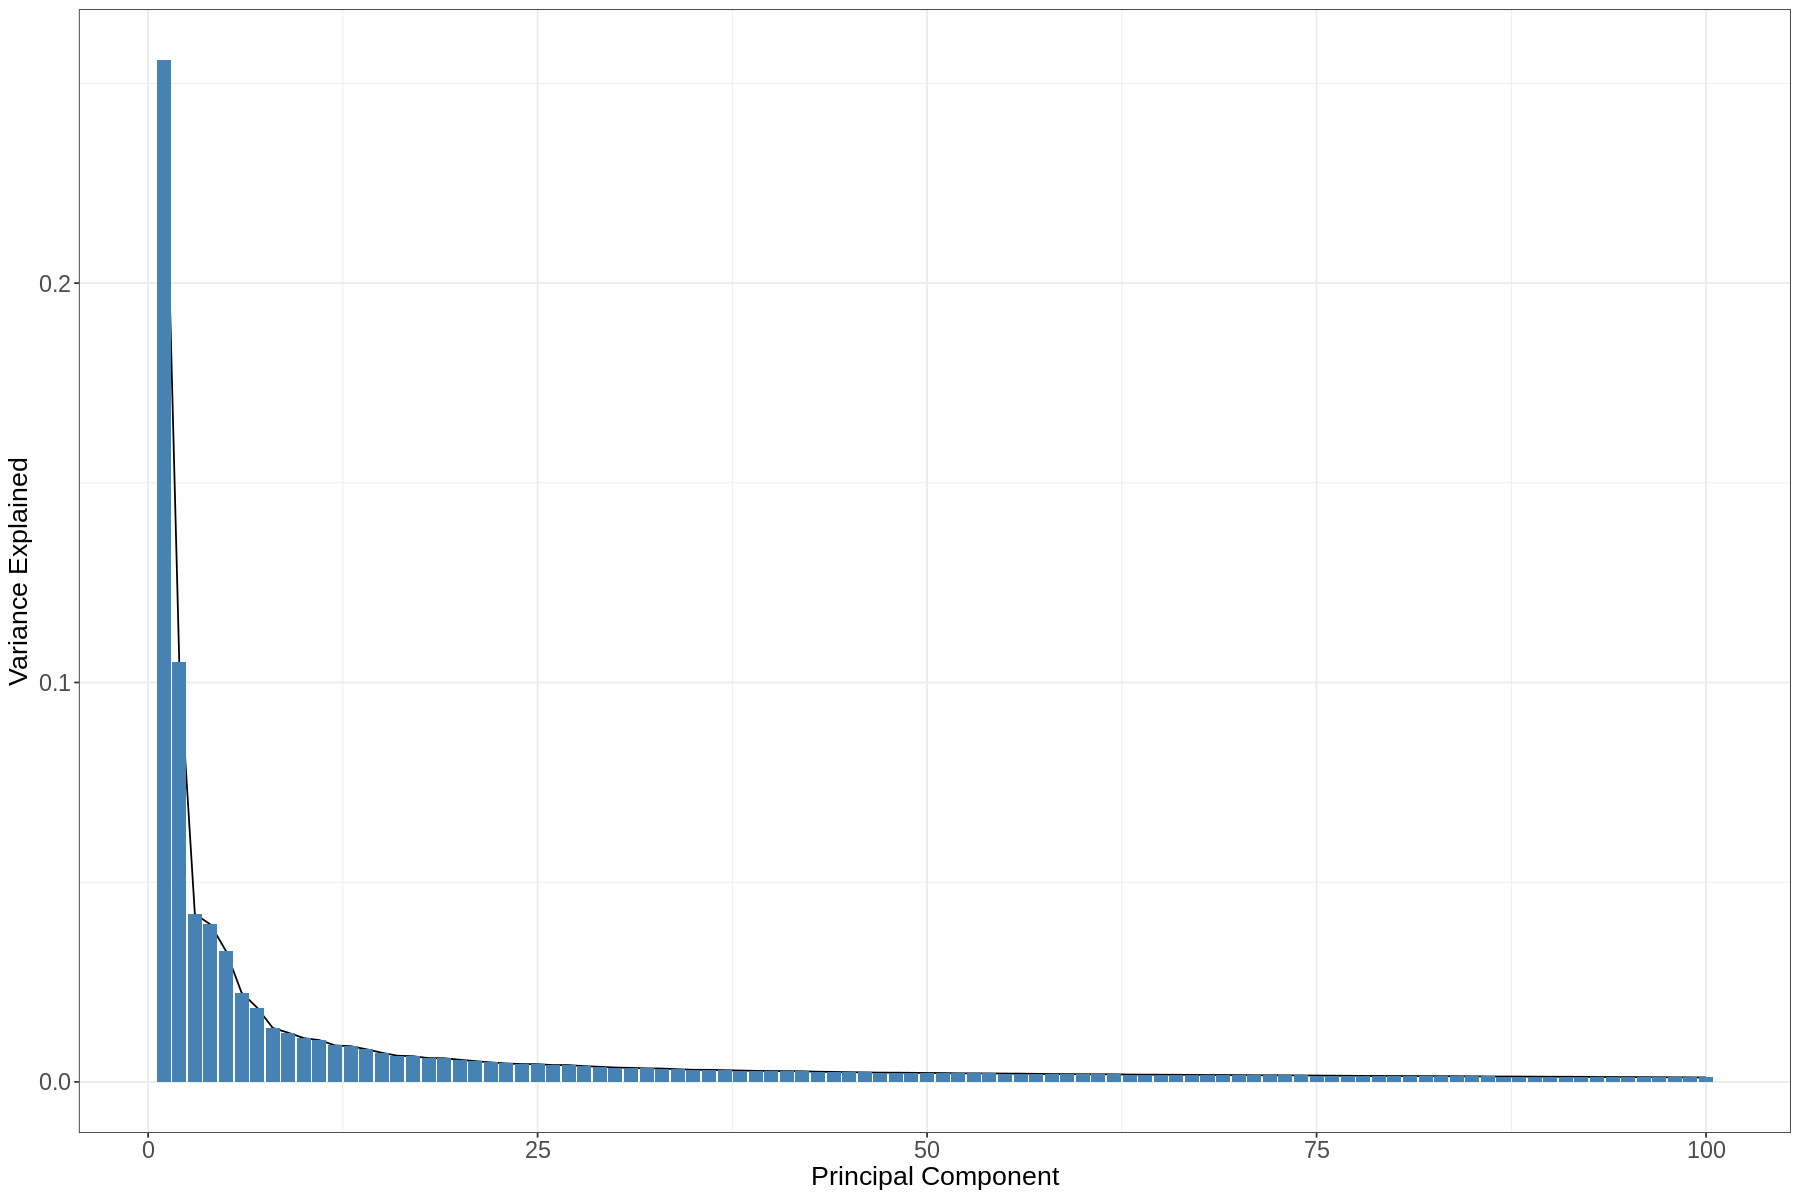

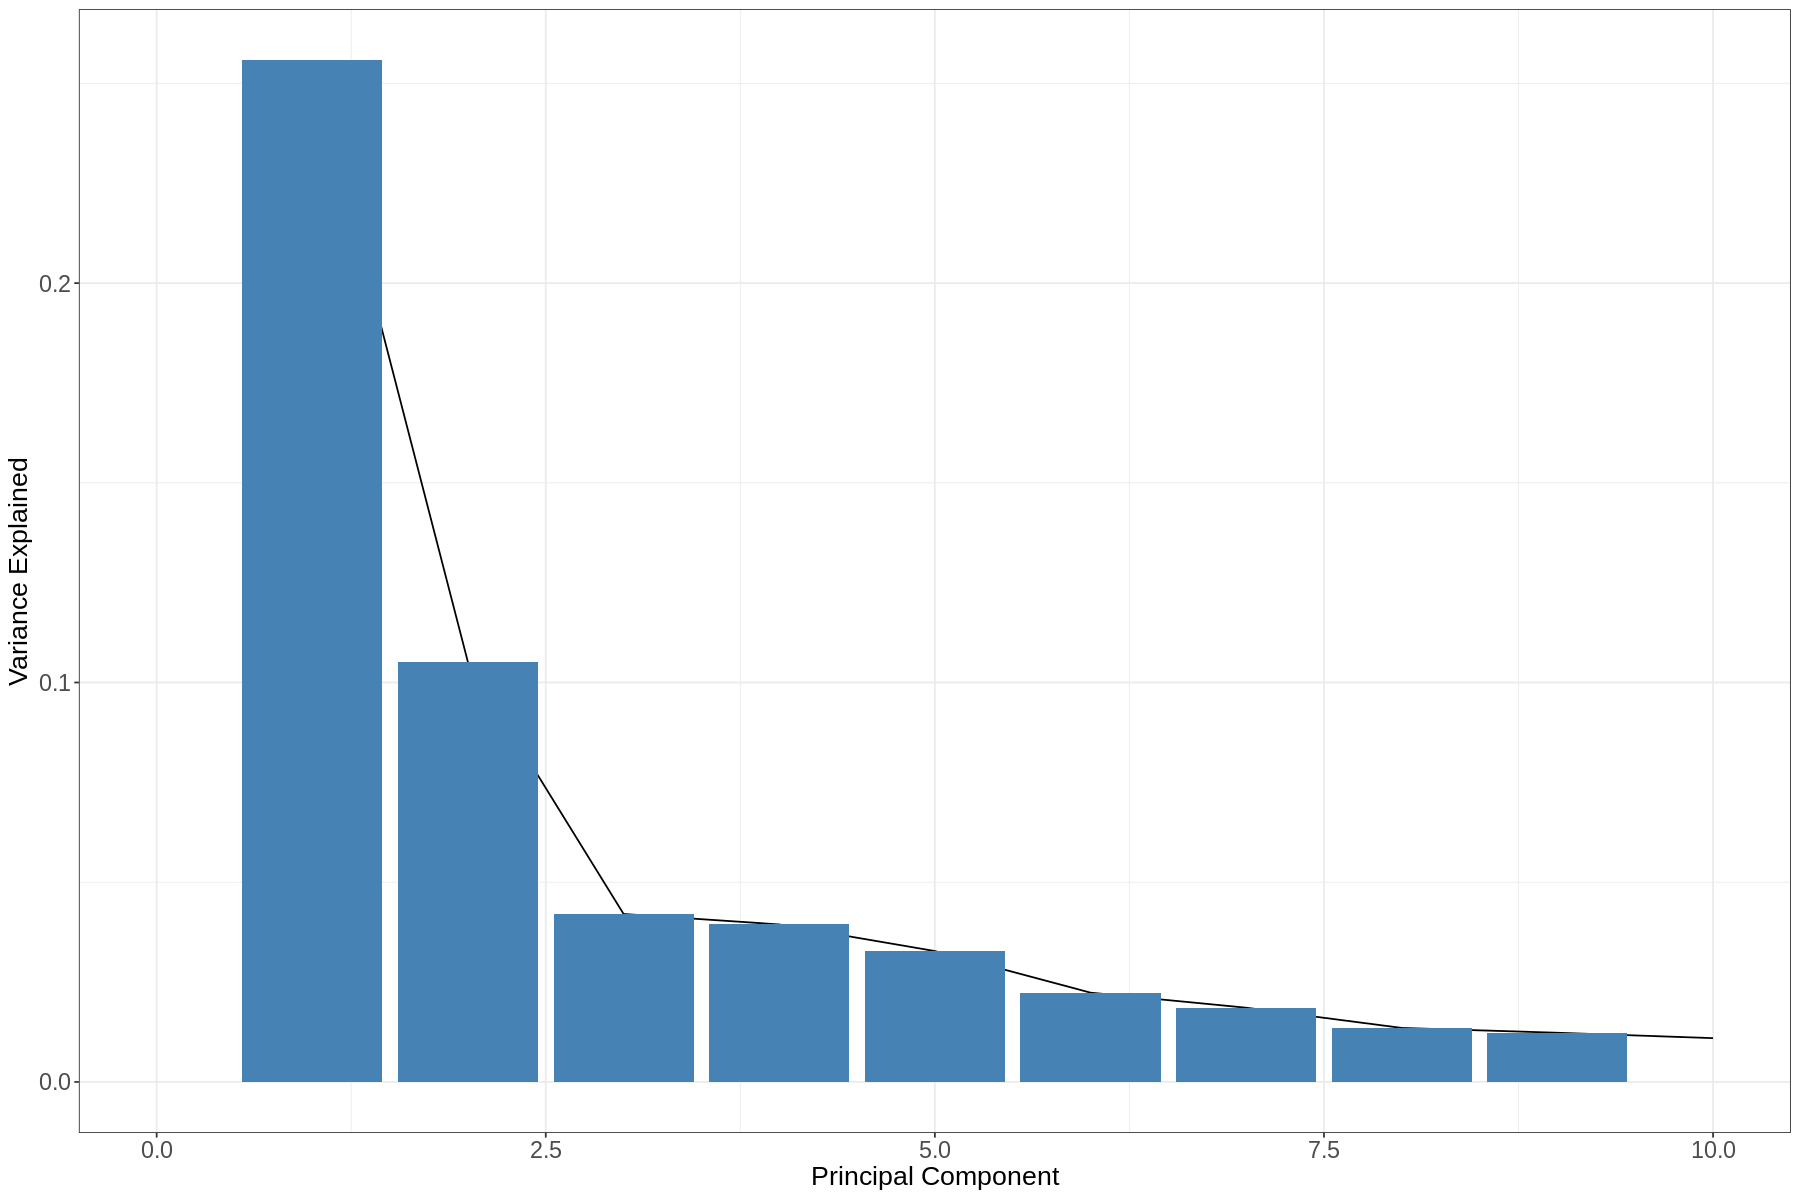

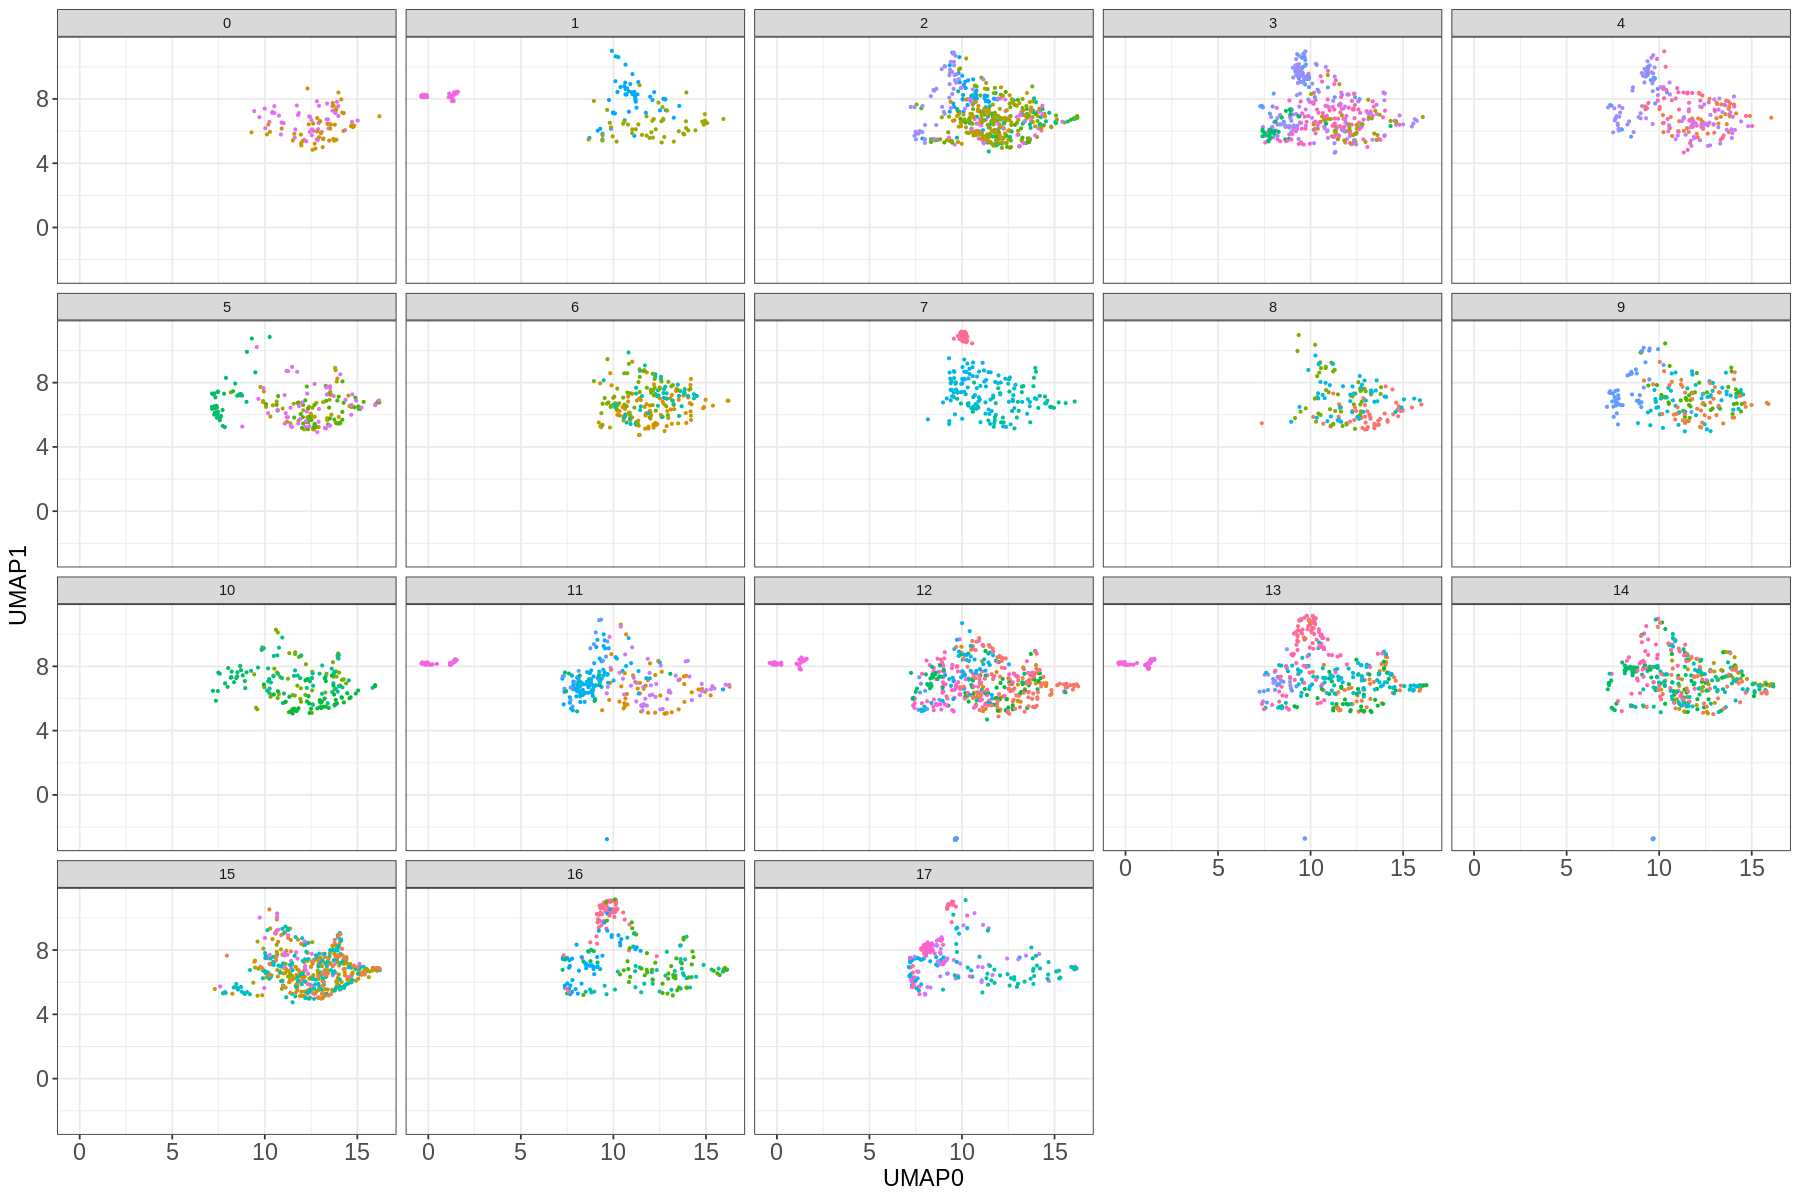

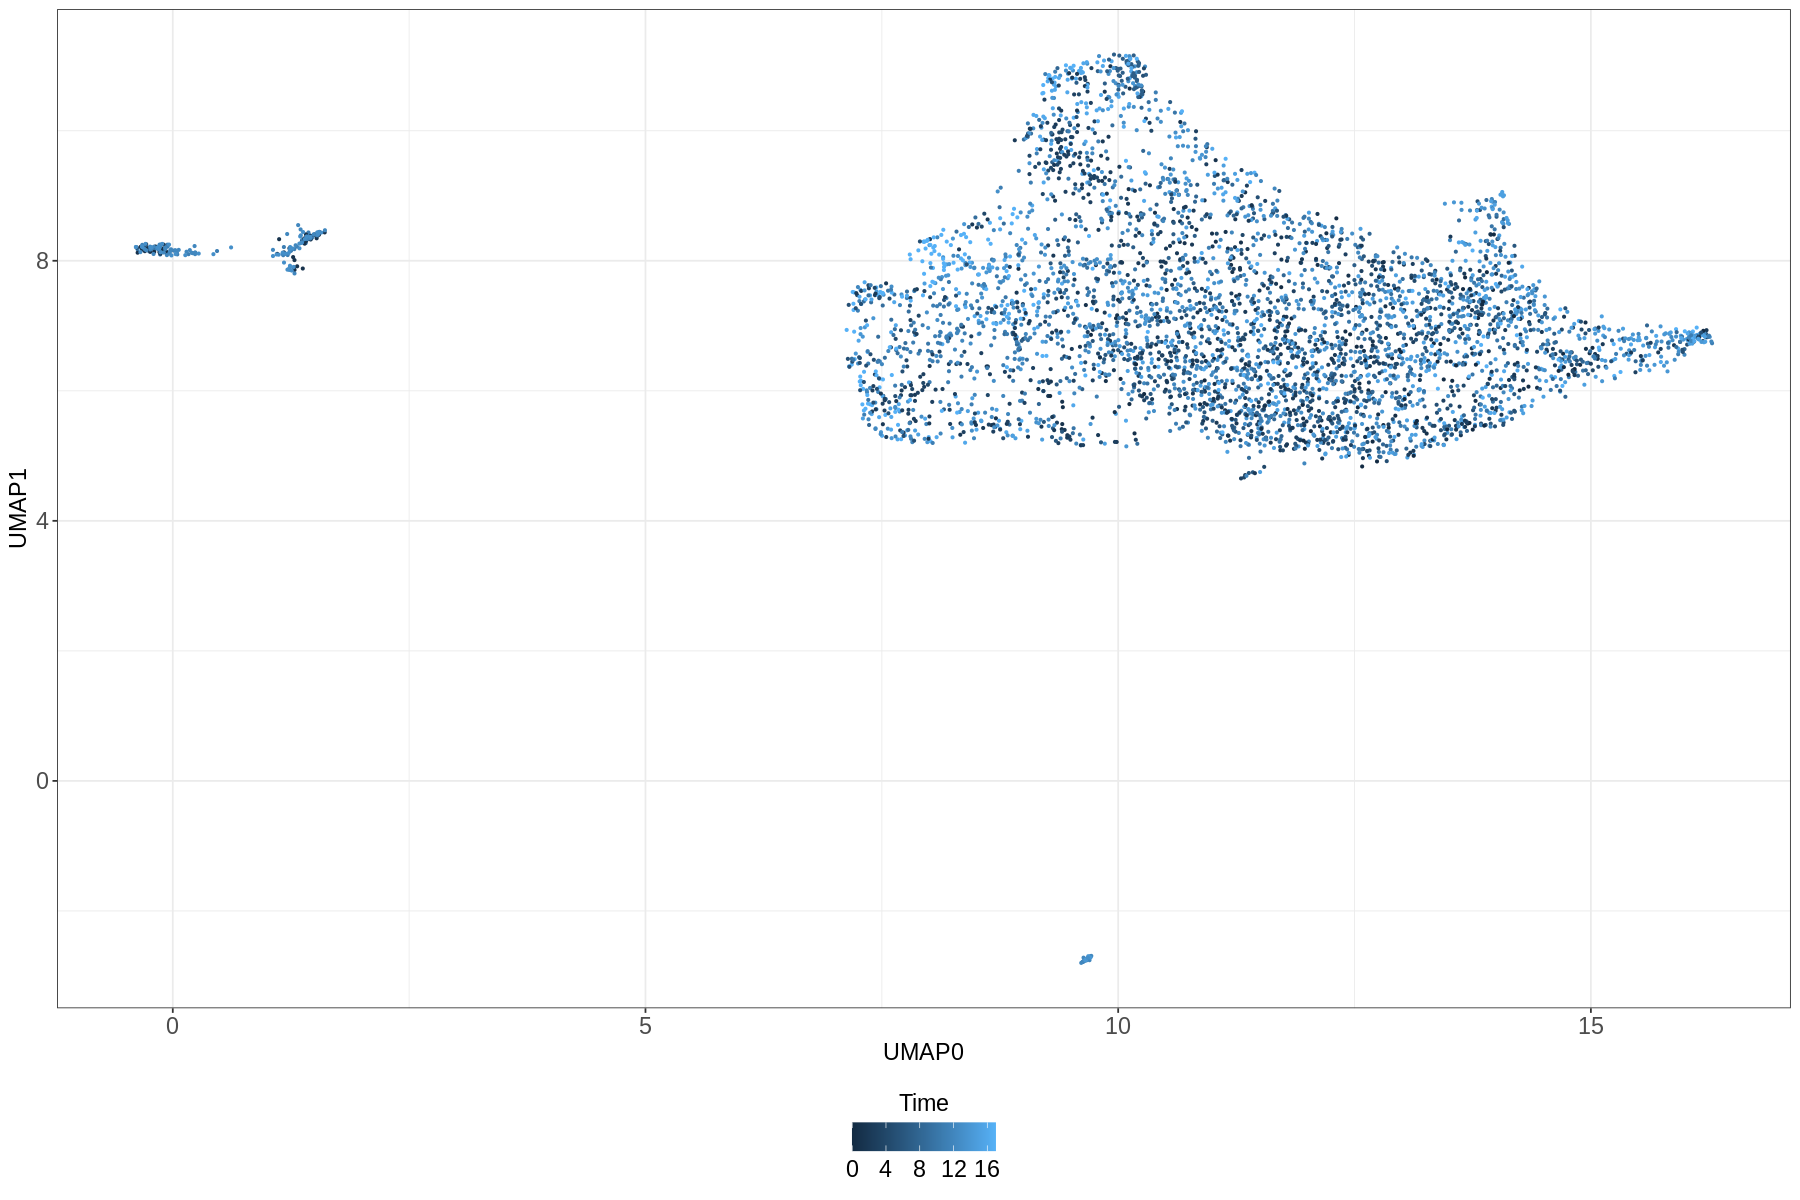

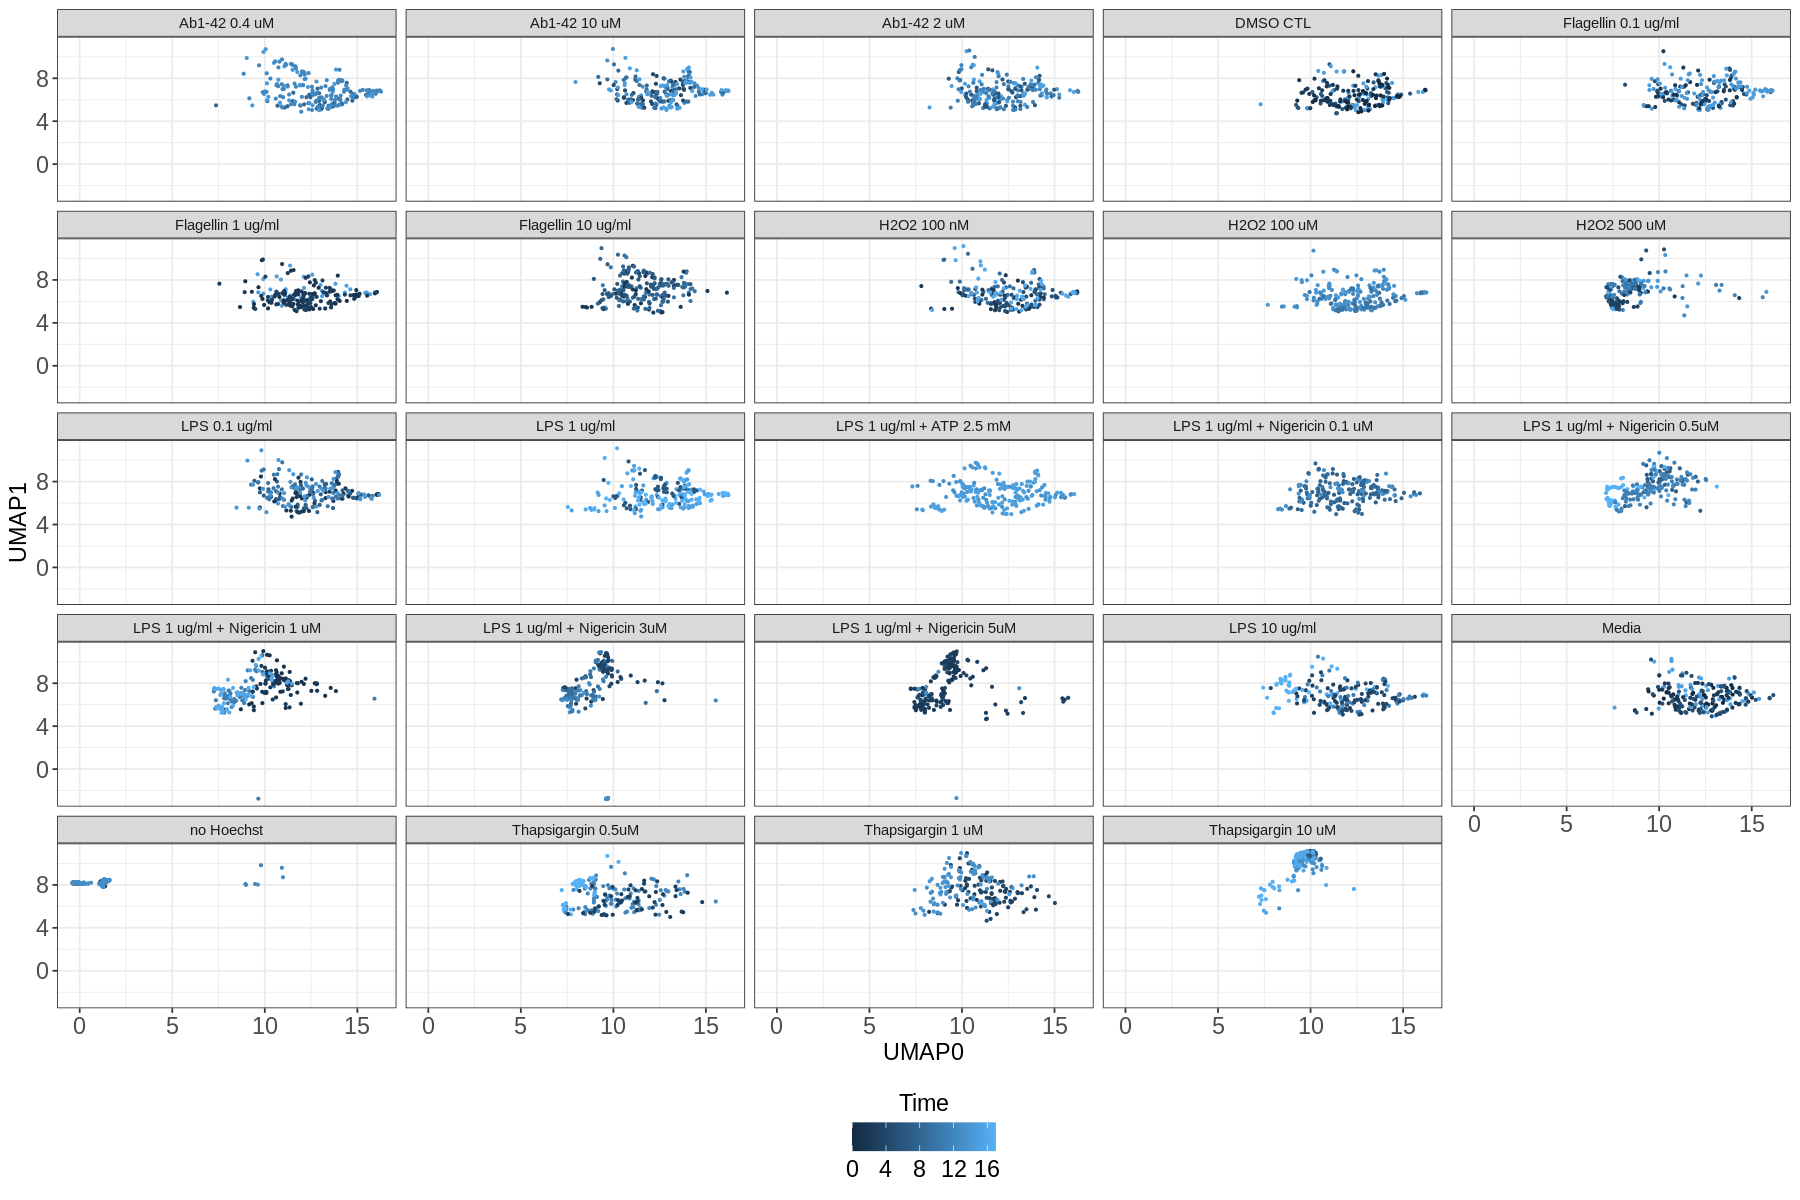

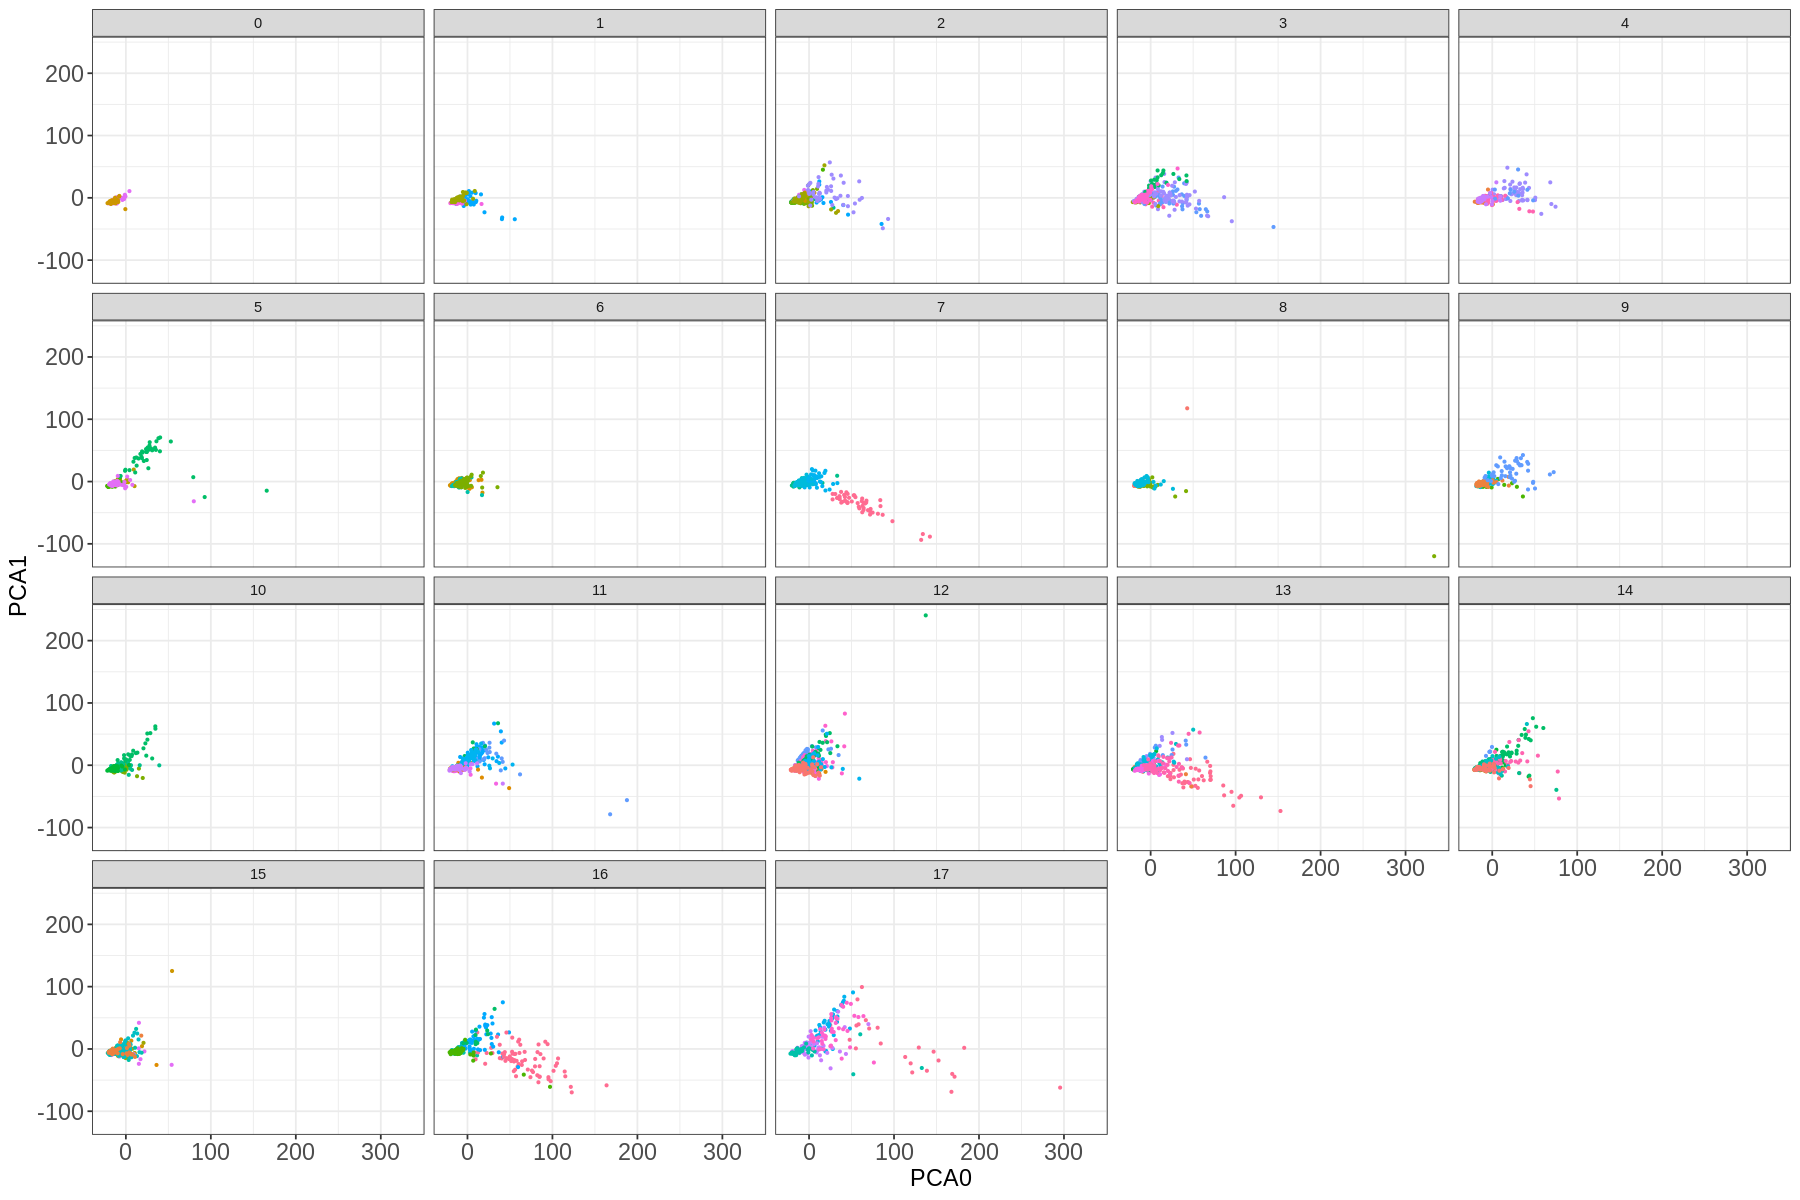

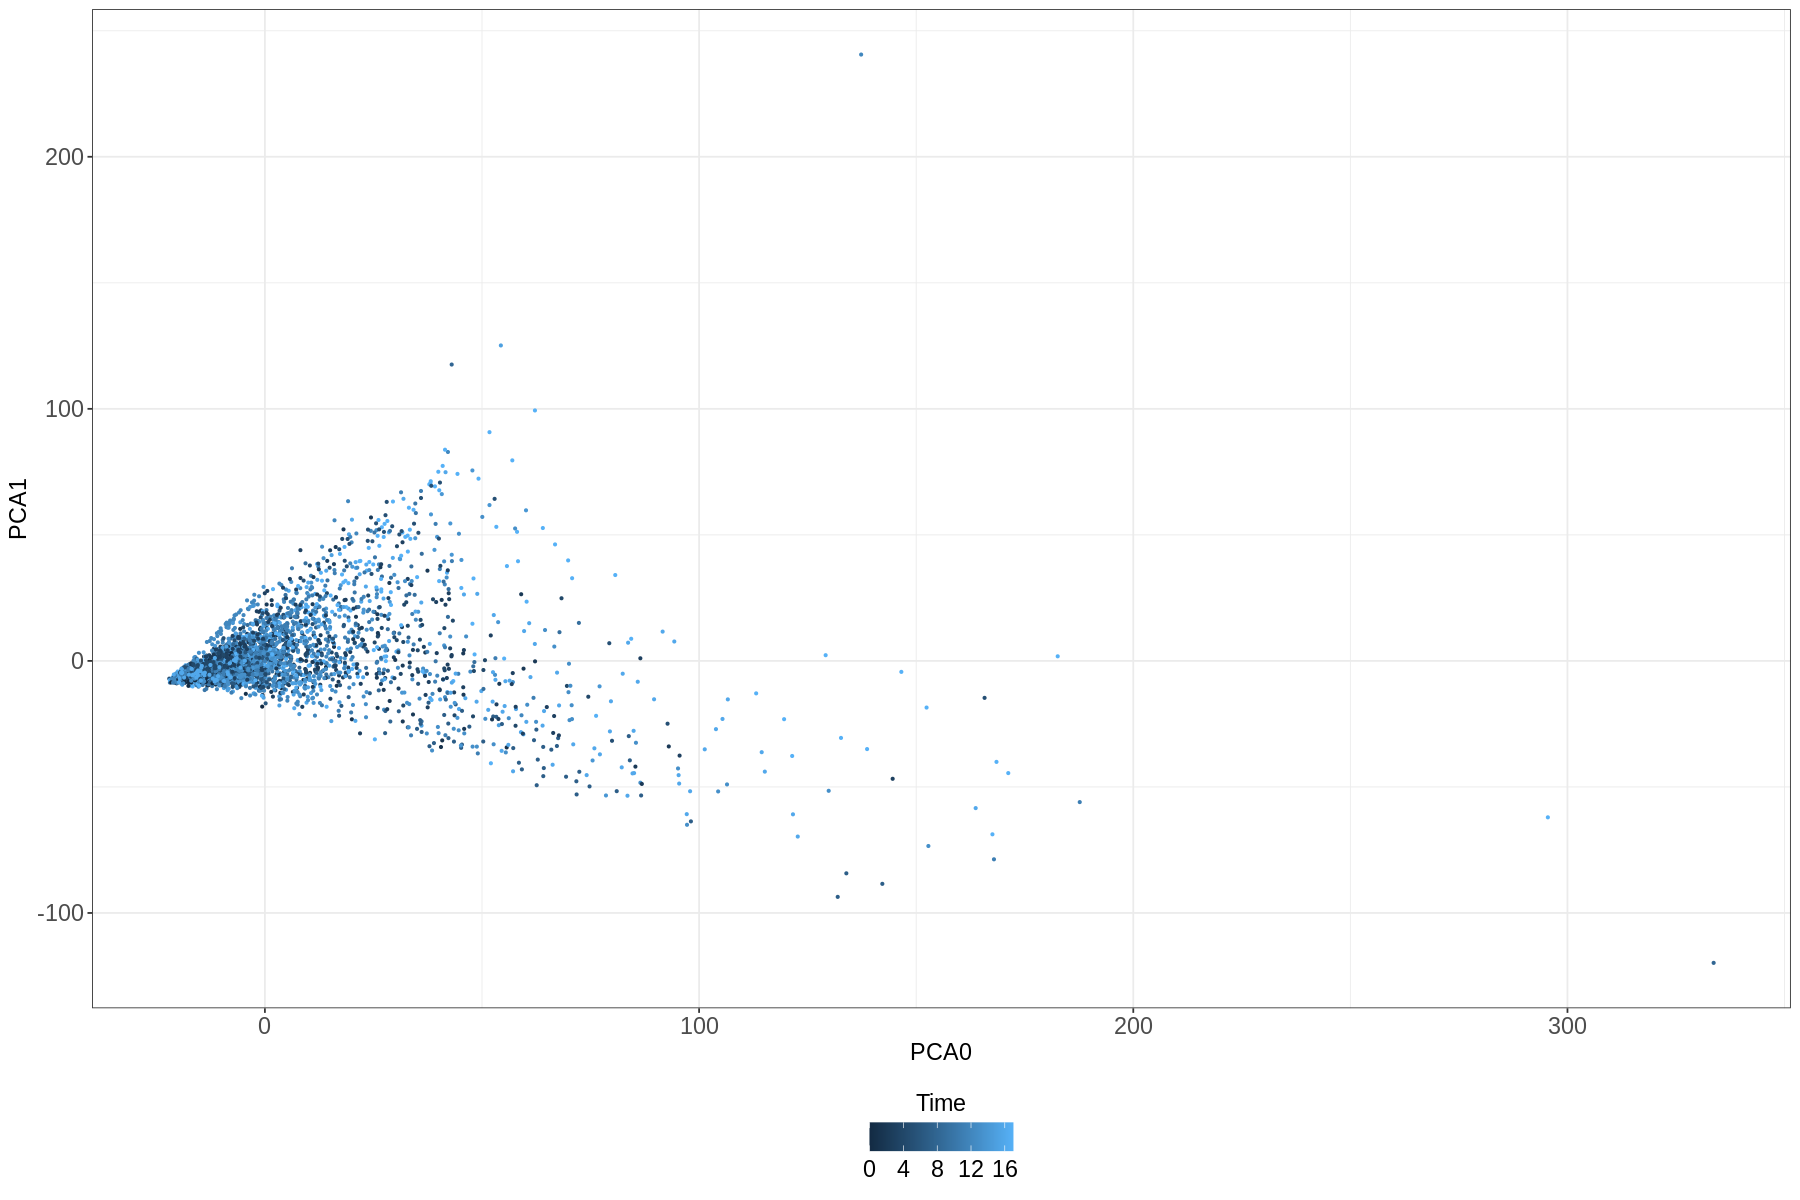

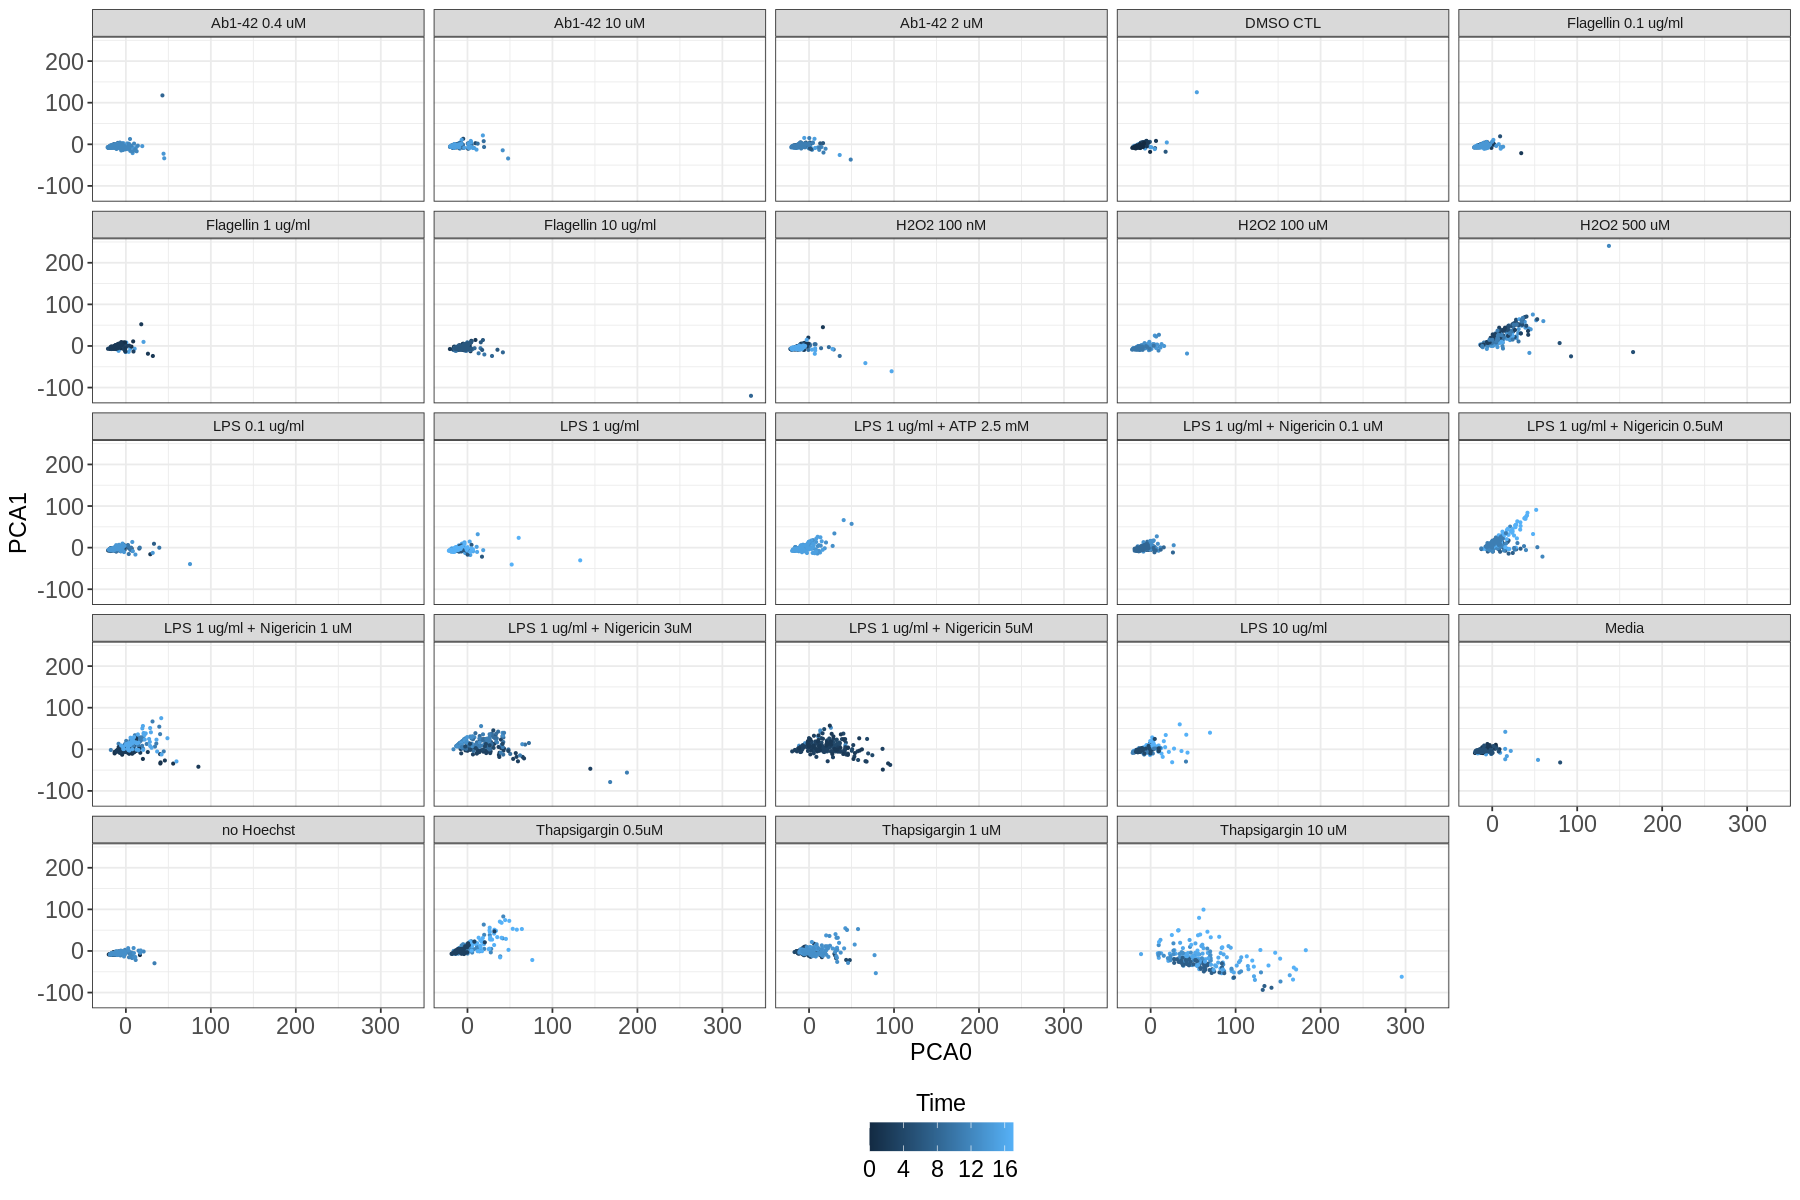

In [18]:
# show the plots here
scree_plot
scree_plot_zoom
umap_plot
umap_all_time_plot
umap_all_time_plot_facet
pca_plot
pca_all_time_plot
pca_all_time_plot_facet

## Serum viz

png 
  2

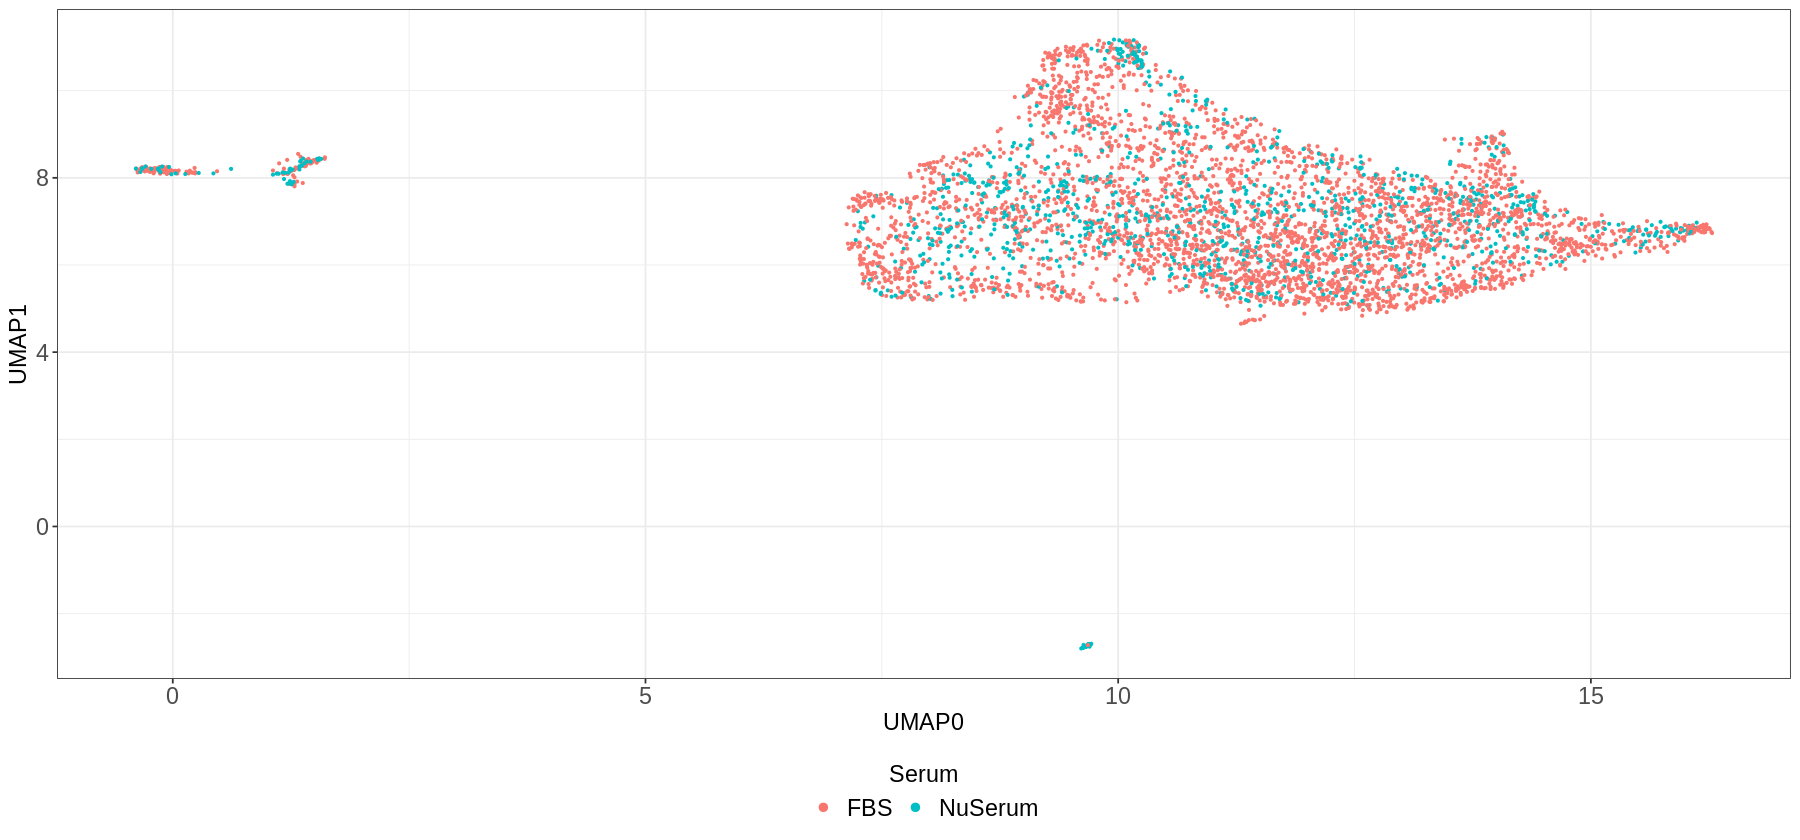

In [19]:
width <- 15
height <- 7
options(repr.plot.width=width, repr.plot.height=height)
umap_serum_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_serum), size=0.5)
    # move the legend to the bottom
    + guides(
        color = guide_legend(nrow = 1, title = "Serum", override.aes = list(size = 2)),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
)
png(file.path(figure_path,"umap_serum_plot.png"), width=width, height=height, units="in", res=600)
umap_serum_plot
dev.off()
umap_serum_plot

In [20]:
umap_over_time_serum_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_serum), size=0.5)
    # move the legend to the bottom
    + guides(
        color = guide_legend(nrow = 1, title = "Serum", override.aes = list(size = 2)),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_Time)
)
png(file.path(figure_path,"umap_over_time_serum_plot.png"), width=width, height=height, units="in", res=600)
umap_over_time_serum_plot
dev.off()

png 
  2

In [21]:
umap_time_serum_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_Time), size=0.5)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_serum)
)
png(file.path(figure_path,"umap_time_serum_plot.png"), width=width, height=height, units="in", res=600)
umap_time_serum_plot
dev.off()

png 
  2

In [22]:
pca_serum_plot <- (
    ggplot(pca_data, aes(x=PCA0, y=PCA1)) 
    + geom_point(aes(color=Metadata_serum), size=0.5)
    # move the legend to the bottom
    + guides(
        color = guide_legend(nrow = 1, title = "Serum", override.aes = list(size = 2)),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
)
png(file.path(figure_path,"pca_serum_plot.png"), width=width, height=height, units="in", res=600)
pca_serum_plot
dev.off()

png 
  2

In [23]:
pca_over_time_serum_plot <- (
    ggplot(pca_data, aes(x=PCA0, y=PCA1)) 
    + geom_point(aes(color=Metadata_serum), size=0.5)
    # move the legend to the bottom
    + guides(
        color = guide_legend(nrow = 1, title = "Serum", override.aes = list(size = 2)),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_Time)
)
png(file.path(figure_path,"pca_over_time_serum_plot.png"), width=width, height=height, units="in", res=600)
pca_over_time_serum_plot
dev.off()

png 
  2

In [24]:
pca_time_serum_plot <- (
    ggplot(pca_data, aes(x=PCA0, y=PCA1)) 
    + geom_point(aes(color=Metadata_Time), size=0.5)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_serum)
)
png(file.path(figure_path,"pca_time_serum_plot.png"), width=width, height=height, units="in", res=600)
pca_time_serum_plot
dev.off()

png 
  2

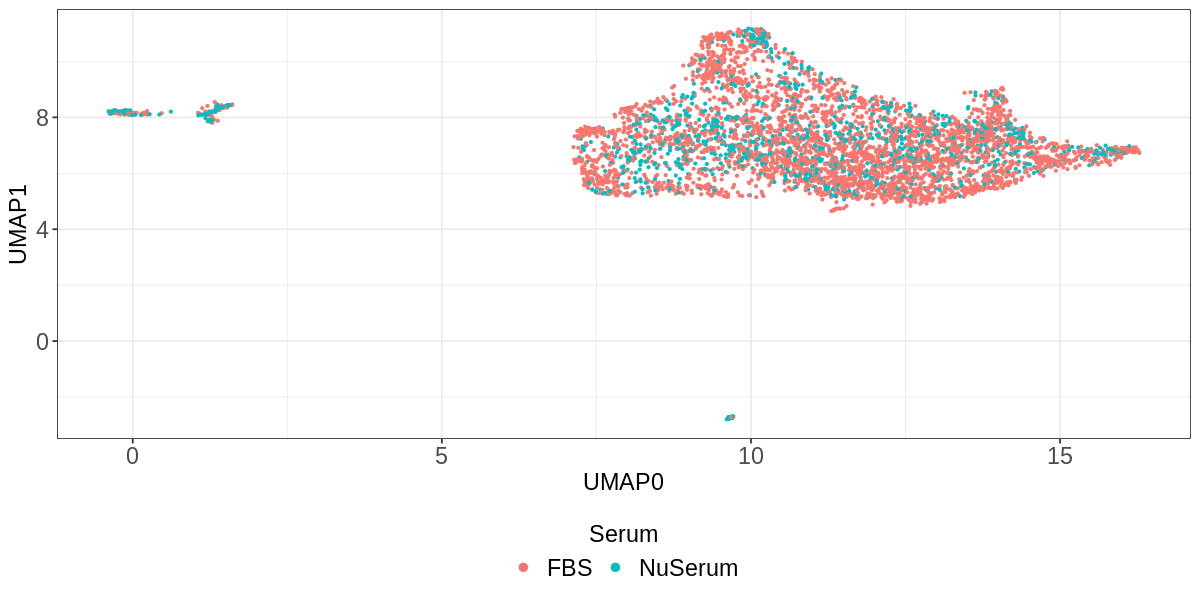

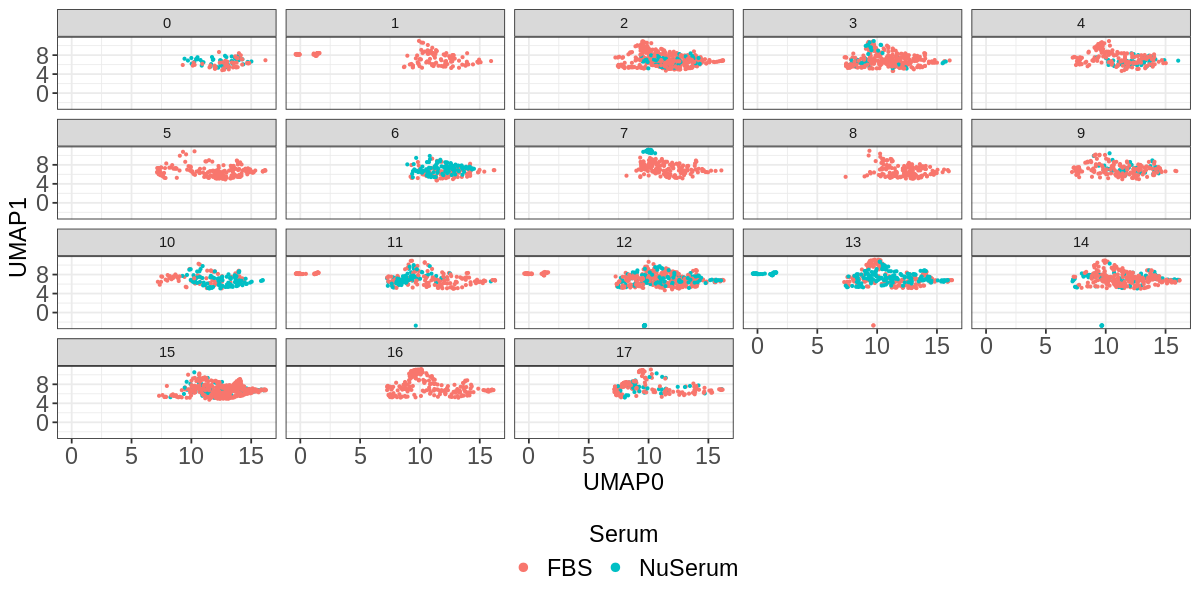

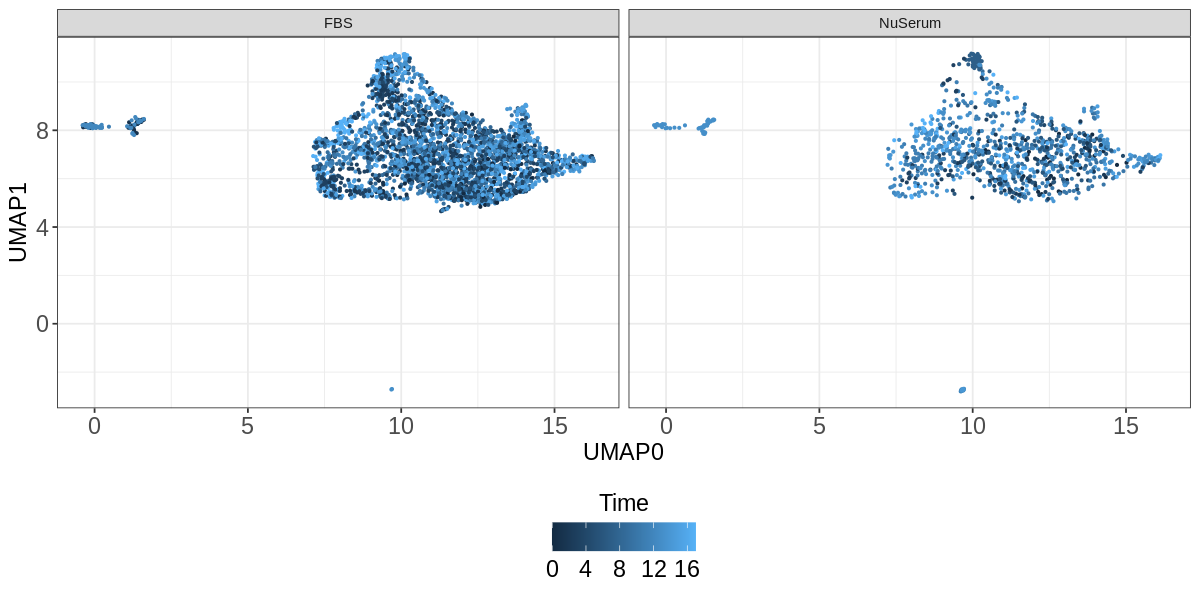

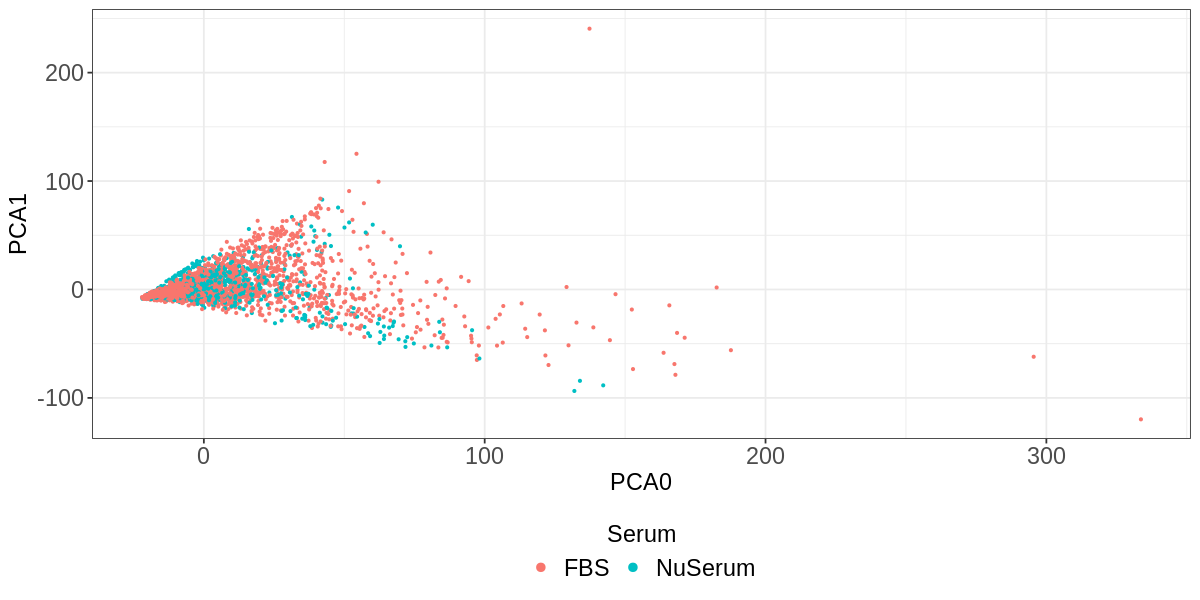

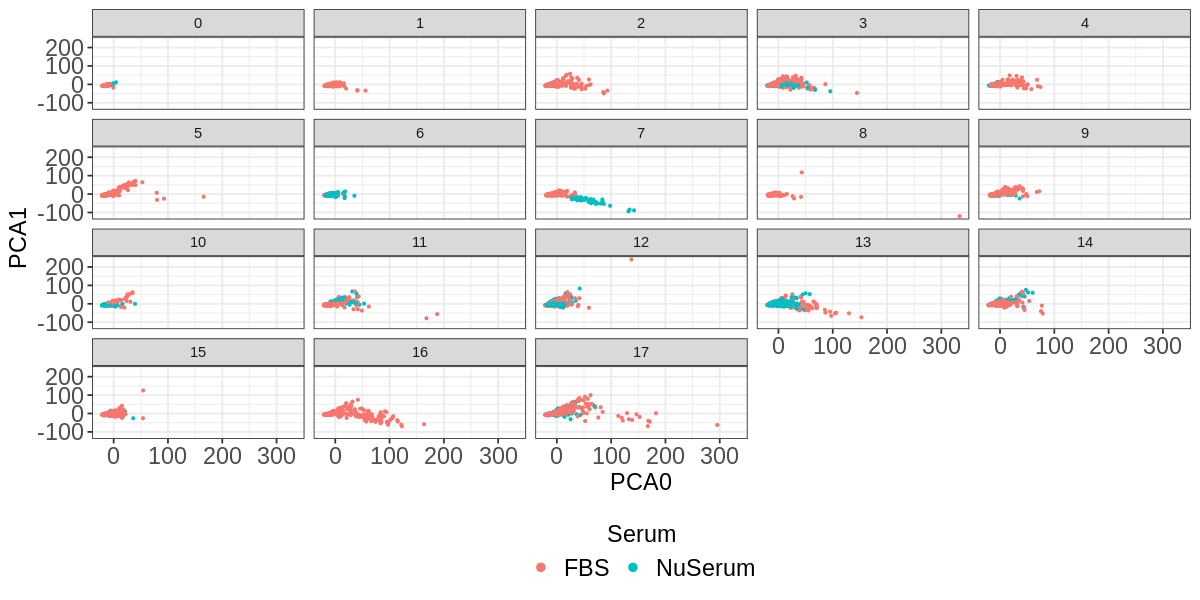

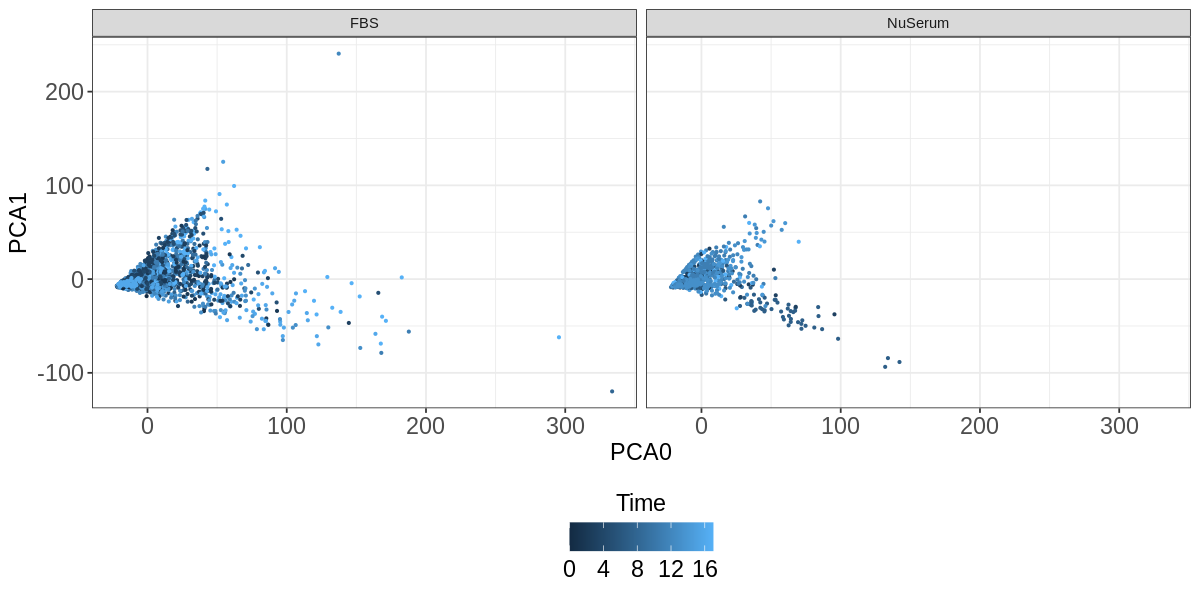

In [25]:
width <- 10
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_serum_plot
umap_over_time_serum_plot
umap_time_serum_plot
pca_serum_plot
pca_over_time_serum_plot
pca_time_serum_plot